Plots from running esn method on anchovy sardine sst data

In [8]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [9]:
def compute_ci(data):

    n = data.shape[1]
    se = scipy.stats.sem(data, axis = 0)
    h = se * scipy.stats.t.ppf(1.95 / 2., n-1)
    return h

In [10]:
def lag_fig(xmapy_surr, ymapx_surr, xmapy, ymapx, x_name, y_name):
    x = np.arange(-10,11)

    mean_xmapy = xmapy.mean(axis = 0)
    mean_ymapx = ymapx.mean(axis = 0)

    ci_xmapy = compute_ci(xmapy)
    ci_ymapx = compute_ci(ymapx)

    fig = plt.figure(figsize = (8,6))
    
#     name_x = x_name[:3]
#     name_y = y_name[:3]

    plt.plot(x, mean_xmapy, 'C0-', label= y_name + r'$\rightarrow$' + x_name)
    plt.plot(x, xmapy_surr.mean(axis = 0), 'C0--', label = y_name + r'$\rightarrow$' + x_name + ' surrogate')
    plt.fill_between(x, mean_xmapy - ci_xmapy, mean_xmapy + ci_xmapy, color='C0', alpha=0.2)

    plt.plot(x, mean_ymapx, 'C1-', label= x_name + r'$\rightarrow$' + y_name)
    plt.plot(x, ymapx_surr.mean(axis = 0), 'C1--', label = x_name + r'$\rightarrow$' + y_name + ' surrogate')
    plt.fill_between(x, mean_ymapx - ci_ymapx, mean_ymapx + ci_ymapx, color='C1', alpha=0.2)

    plt.xticks(x)
    plt.grid(linestyle = '--', alpha = 0.5)

    plt.ylabel(r'$\rho$', rotation = 0)
    plt.xlabel(r'$\tau$')
    #plt.title('Correlation vs Lag')
    plt.legend(loc = 4)
    #plt.savefig('para_didi.png', dpi=300)

#     return fig

In [5]:
# import the results
anchovy_np = np.load('anchovy_np_sst.npy')
anchovy_sardine = np.load('anchovy_sardine.npy')
anchovy_sio = np.load('anchovy_sio_sst.npy')
sardine_np = np.load('sardine_np_sst.npy')
sardine_sio = np.load('sardine_sio_sst.npy')
sio_np = np.load('sio_sst_np_sst.npy')

In [6]:
anchovy_np.shape

(200, 21, 4)

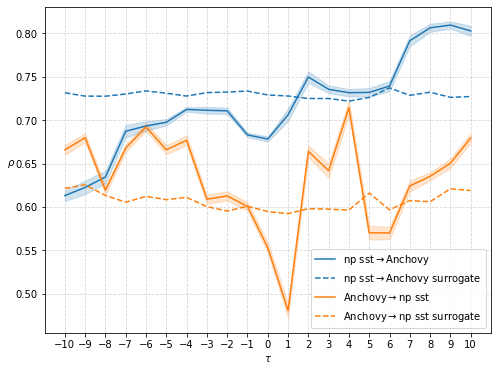

In [12]:
lag_fig(anchovy_np[:,:,0], anchovy_np[:,:,1], anchovy_np[:,:,2], anchovy_np[:,:,3], 'Anchovy', 'np sst')

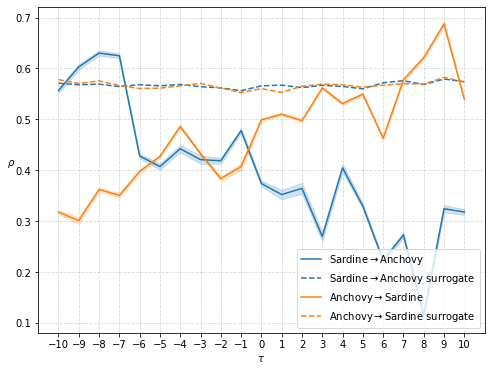

In [13]:
lag_fig(anchovy_sardine[:,:,0], anchovy_sardine[:,:,1], anchovy_sardine[:,:,2], anchovy_sardine[:,:,3], 'Anchovy', 'Sardine')

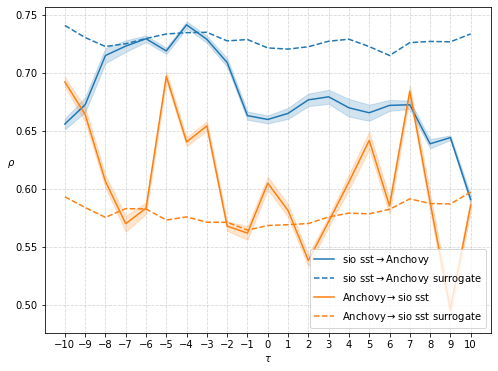

In [14]:
lag_fig(anchovy_sio[:,:,0], anchovy_sio[:,:,1], anchovy_sio[:,:,2], anchovy_sio[:,:,3], 'Anchovy', 'sio sst')

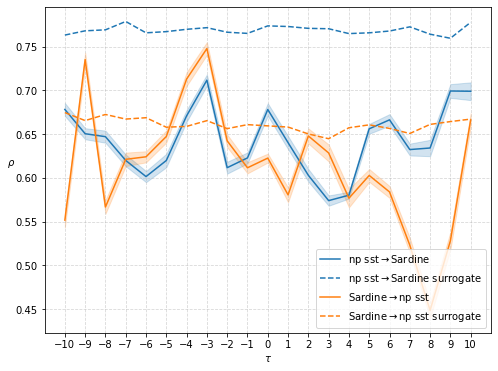

In [15]:
lag_fig(sardine_np[:,:,0], sardine_np[:,:,1], sardine_np[:,:,2], sardine_np[:,:,3], 'Sardine', 'np sst')

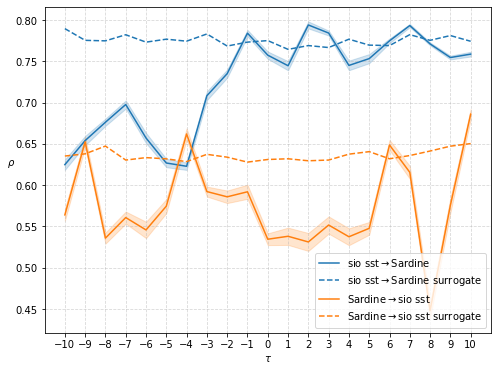

In [17]:
lag_fig(sardine_sio[:,:,0], sardine_sio[:,:,1], sardine_sio[:,:,2], sardine_sio[:,:,3], 'Sardine', 'sio sst')

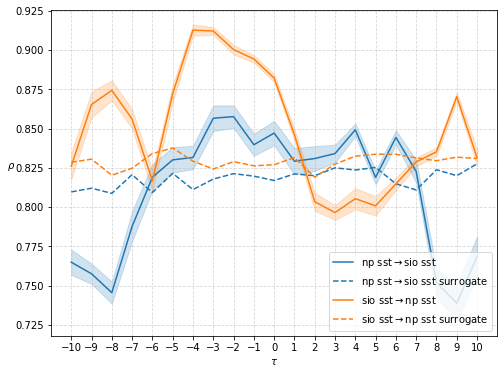

In [19]:
lag_fig(sio_np[:,:,0], sio_np[:,:,1], sio_np[:,:,2], sio_np[:,:,3], 'sio sst', 'np sst')